In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
####CLEANING
dataset_path = "./anime-dataset-2023.csv"
anime_original_dataset = pd.read_csv(dataset_path)

numbers_cols = ["anime_id", "Score", "Episodes", "Rank", "Popularity", "Favorites", "Scored By", "Members"]
strings_cols = ["Name", "English name", "Other name", "Genres", "Synopsis", "Aired", "Premiered", "Producers", "Licensors", "Studios", "Duration", "Image URL"]
categorical_cols = ["Type", "Status", "Source", "Rating"]
all_cols = numbers_cols + strings_cols + categorical_cols

anime_original_dataset = anime_original_dataset[all_cols]

cols_we_dont_want = ["anime_id"] + strings_cols
anime_full_dataset = anime_original_dataset.drop(columns=cols_we_dont_want)
numbers_cols = numbers_cols[1:] # remove anime id from numbers_col

anime_full_dataset.replace("UNKNOWN", pd.NA, inplace=True)
anime_full_dataset.replace("Unknown", pd.NA, inplace=True)
anime_full_dataset.replace("Rx - Hentai", pd.NA, inplace=True) #remove unappropriate category

current_rows = anime_full_dataset.shape[0]
anime_full_dataset.dropna(inplace=True, how='any')#remove rows with any NaN value
after_filter_rows = anime_full_dataset.shape[0]
print(f"we started with {current_rows} rows and after cleaning we got: {after_filter_rows}")

#grouping for source column
#['4-koma manga' => Manga,
# 'Book' => Other,
# 'Card game' => Game,
# 'Game',
# 'Light novel' => Novel,
# 'Manga',
# 'Mixed media' => Other,
# 'Music' => Other,
# 'Novel',
# 'Original',
# 'Other',
# 'Picture book' => Other,
# 'Radio' => Other,
# 'Unknown',
# 'Visual novel' => Novel,
# 'Web manga' => Manga,
# 'Web novel' => Novel]
anime_full_dataset.replace("4-koma manga", "Manga", inplace=True)
anime_full_dataset.replace("Card game", "Game", inplace=True)
anime_full_dataset.replace("Light novel", "Novel", inplace=True)
anime_full_dataset.replace("Visual novel", "Novel", inplace=True)
anime_full_dataset.replace("Web manga", "Manga", inplace=True)
anime_full_dataset.replace("Web novel", "Novel", inplace=True)
anime_full_dataset.replace("Book", "Other", inplace=True)
anime_full_dataset.replace("Mixed media", "Other", inplace=True)
anime_full_dataset.replace("Music", "Other", inplace=True)
anime_full_dataset.replace("Picture book", "Other", inplace=True)
anime_full_dataset.replace("Radio", "Novel", inplace=True)
print(anime_full_dataset["Source"].value_counts())

we started with 24905 rows and after cleaning we got: 11113
Source
Manga       4210
Original    3500
Novel       1787
Game         907
Other        709
Name: count, dtype: int64


In [5]:

for col in numbers_cols:
    anime_full_dataset[col] = pd.to_numeric(anime_full_dataset[col], errors='coerce')

anime_full_dataset.head(20)

,Score,Episodes,Rank,Popularity,Favorites,Scored By,Members,Type,Status,Source,Rating
0,8.75,26.0,41.0,43,78525,914193.0,1771505,TV,Finished Airing,Original,R - 17+ (violence & profanity)
1,8.38,1.0,189.0,602,1448,206248.0,360978,Movie,Finished Airing,Original,R - 17+ (violence & profanity)
2,8.22,26.0,328.0,246,15035,356739.0,727252,TV,Finished Airing,Manga,PG-13 - Teens 13 or older
3,7.25,26.0,2764.0,1795,613,42829.0,111931,TV,Finished Airing,Original,PG-13 - Teens 13 or older
4,6.94,52.0,4240.0,5126,14,6413.0,15001,TV,Finished Airing,Manga,PG - Children
5,7.92,145.0,688.0,1252,1997,86524.0,177688,TV,Finished Airing,Manga,PG-13 - Teens 13 or older
6,8.00,24.0,589.0,862,4136,81747.0,260166,TV,Finished Airing,Manga,PG-13 - Teens 13 or older
7,7.55,52.0,1551.0,4212,237,12960.0,24172,TV,Finished Airing,Manga,PG-13 - Teens 13 or older
8,8.16,24.0,393.0,1273,1237,97878.0,173710,TV,Finished Airing,Manga,PG-13 - Teens 13 or older
9,8.87,74.0,26.0,142,47235,368569.0,1013100,TV,Finished Airing,Manga,R+ - Mild Nudity


<Axes: >

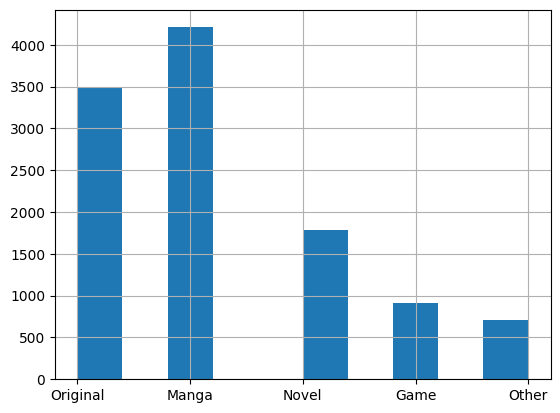

In [6]:
# @title Source histogram
anime_full_dataset.Source.hist()

An histogram that show how many animes we have in each of our source's categories ("Original", "Manga", "Novel", "Game", and "Other"). We choose Sorce to be our target feature because we want to classify an anime to her Source.

PART 2

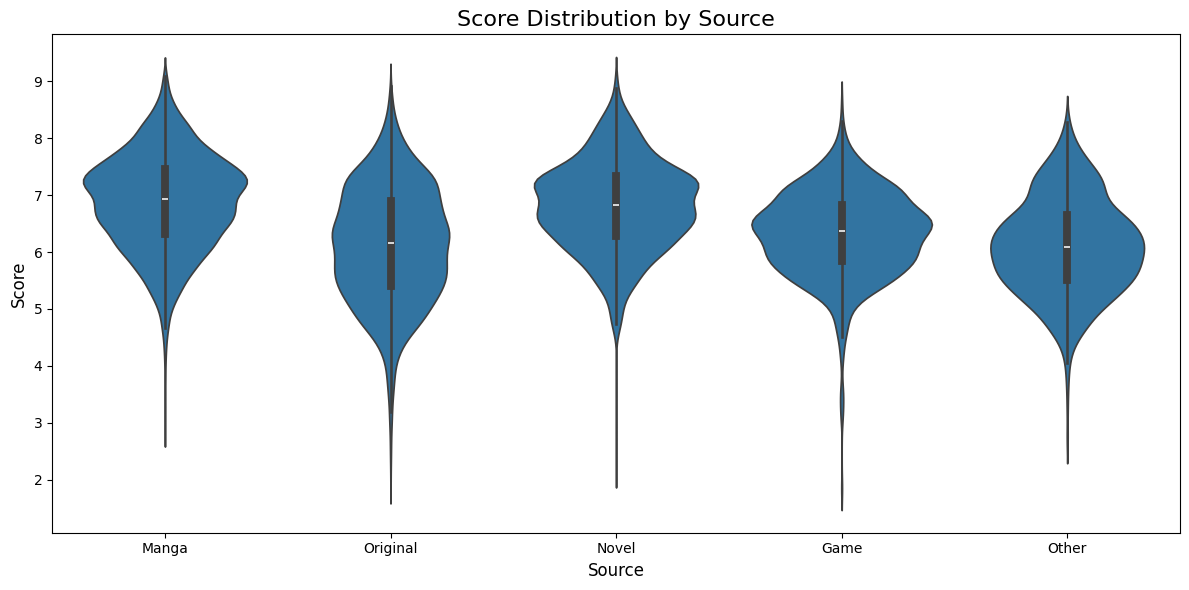

In [7]:
# @title Violin plot Score by Source
def violin_column_by_source(df, column_name):
  plt.figure(figsize=(10, 4))
  sns.violinplot(data=df, x='Source', y=column_name, order=categories['Source'])
  plt.title(f"{column_name} Distribution by Source", fontsize=16)
  plt.xlabel('Source', fontsize=12)
  plt.ylabel(column_name, fontsize=12)
  plt.tight_layout()
  plt.show()

def violin_score_by_source(df):
  violin_column_by_source(df, "Score")
#violin_score_by_source(anime_full_dataset)

plt.figure(figsize=(12, 6))
sns.violinplot(data=anime_full_dataset, x='Source', y='Score', order=anime_full_dataset['Source'].value_counts().index)
plt.title('Score Distribution by Source', fontsize=16)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.tight_layout()
plt.show()

The graph shows a violin plot visualizing the distribution of "Score" across different "Source" categories ("Original", "Manga", "Novel", "Game", and "Other"). We can see here what is the midian score of each category and the boxplot of each category. This could help us to identify the Source category of an anime by his score and the disrtribution of the "Source" feature by "Score" and his impact on "Source" feature. For example "Novel" and "Manga" have higer midian from the rest.

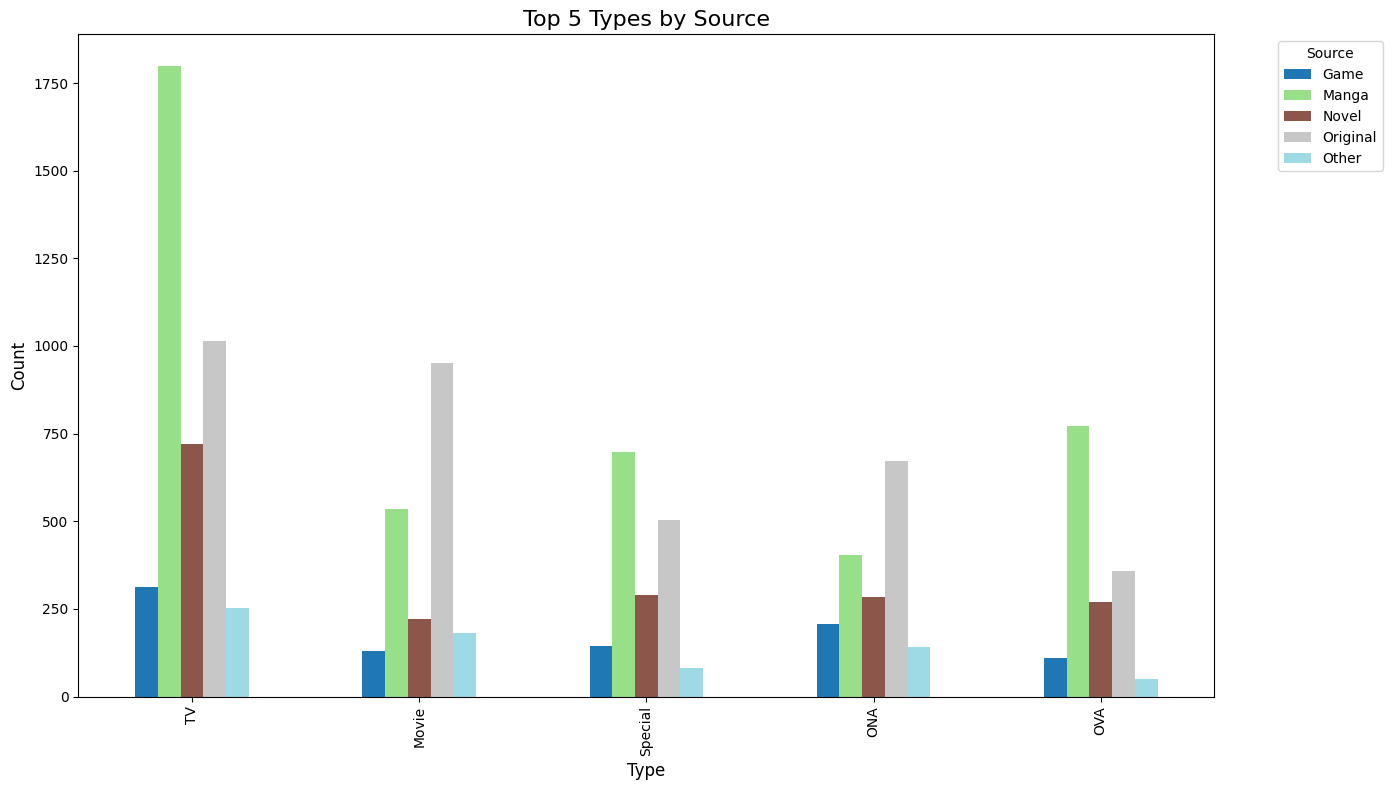

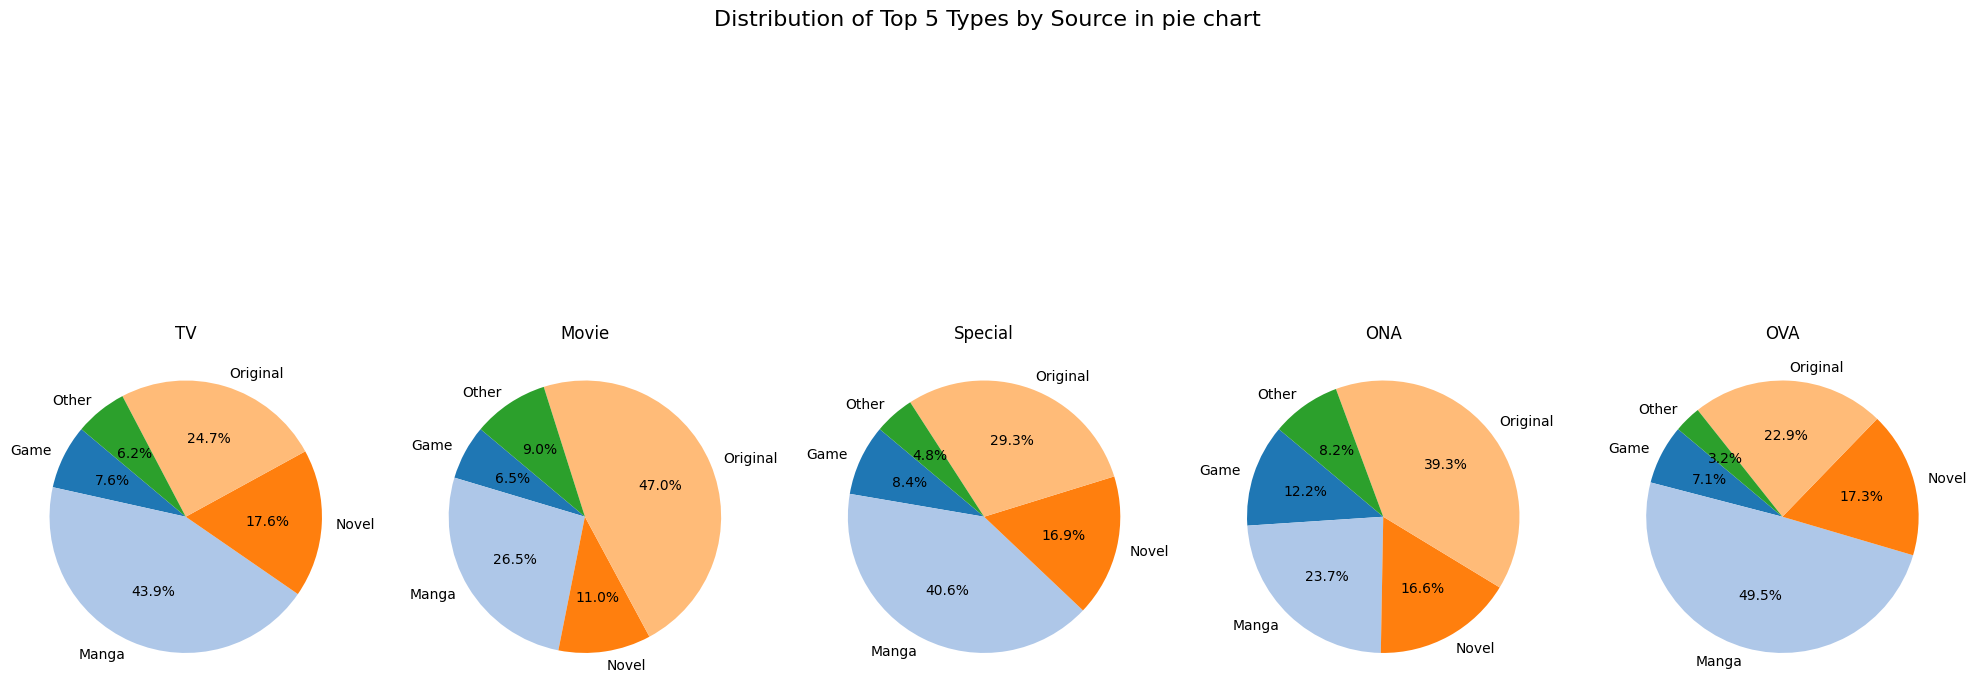

In [8]:
# @title Pie Chart of Type By Source of the distribution of the top 5 Types
genre_dummies = anime_full_dataset['Type'].str.get_dummies(', ')
genre_by_source = genre_dummies.groupby(anime_full_dataset['Source']).sum()
top_10_genres = genre_dummies.sum().sort_values(ascending=False).head(5).index
genre_by_source_top = genre_by_source[top_10_genres]
genre_by_source_top.T.plot(kind='bar', figsize=(14, 8), stacked=False, colormap='tab20')
plt.title("Top 5 Types by Source", fontsize=16)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

top_10_genres_data = genre_by_source_top.T
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
axes = axes.flatten()
for i, genre in enumerate(top_10_genres):
    ax = axes[i]
    genre_data = top_10_genres_data.loc[genre]
    ax.pie(genre_data, labels=genre_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    ax.set_title(genre, fontsize=12)
plt.suptitle("Distribution of Top 5 Types by Source in pie chart", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



The graph shows a bar plots and a Pie Chart plot visualizing of the distribution of "Type" across different "Source" categories ("Original", "Manga", "Novel", "Game", and "Other"). We can see here what the distribution of the Type's categories in numbers and in precents. This could help us to identify the Source category of an anime by his Type and the disrtribution of the "Type" feature by "Source" and his impact on "Source" feature. For example if we see movie it's could be mostly "Original" or "Manga".

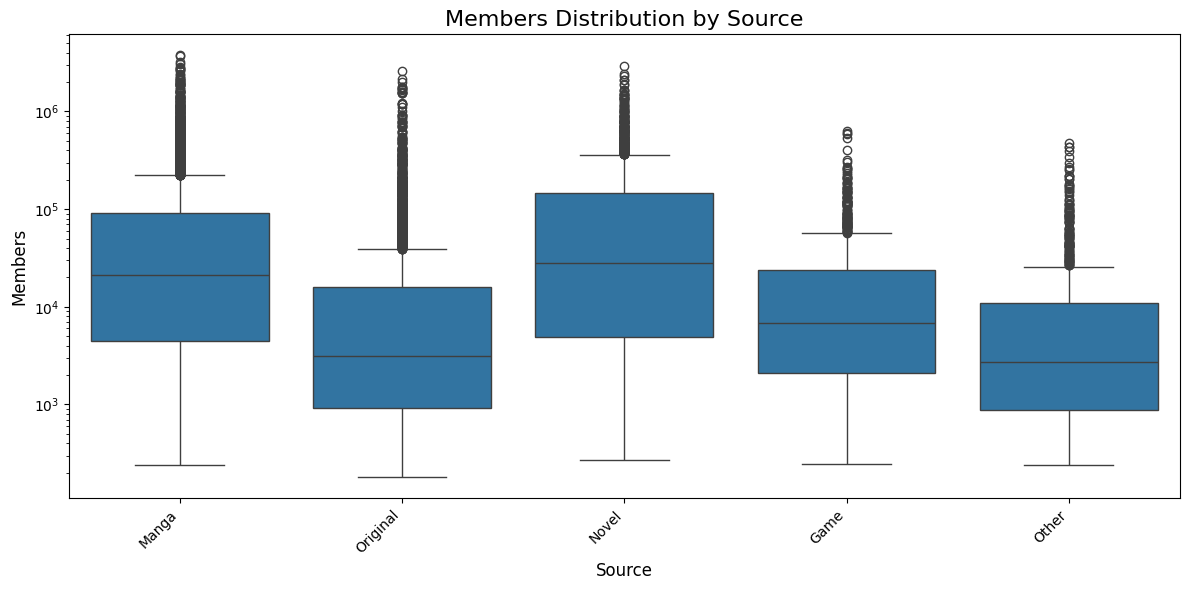

In [9]:
# @title Box plot of Members by Source
plt.figure(figsize=(12, 6))
sns.boxplot(data=anime_full_dataset, x='Source', y='Members', order=anime_full_dataset['Source'].value_counts().index)
plt.title('Members Distribution by Source', fontsize=16)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Members', fontsize=12)
plt.yscale('log')  # Log scale for better handling of extreme values
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph shows a box plot that visualizing the distribution of "Members" across different "Source" categories ("Original", "Manga", "Novel", "Game", and "Other"). We can see here what is the midian members of each category and . This could help us to identify the "Source" category of an anime by his members and the disrtribution of the "Source" feature by "Members" and his impact on "Source" feature. For example "Novel" and "Manga" have higer midian from the rest.

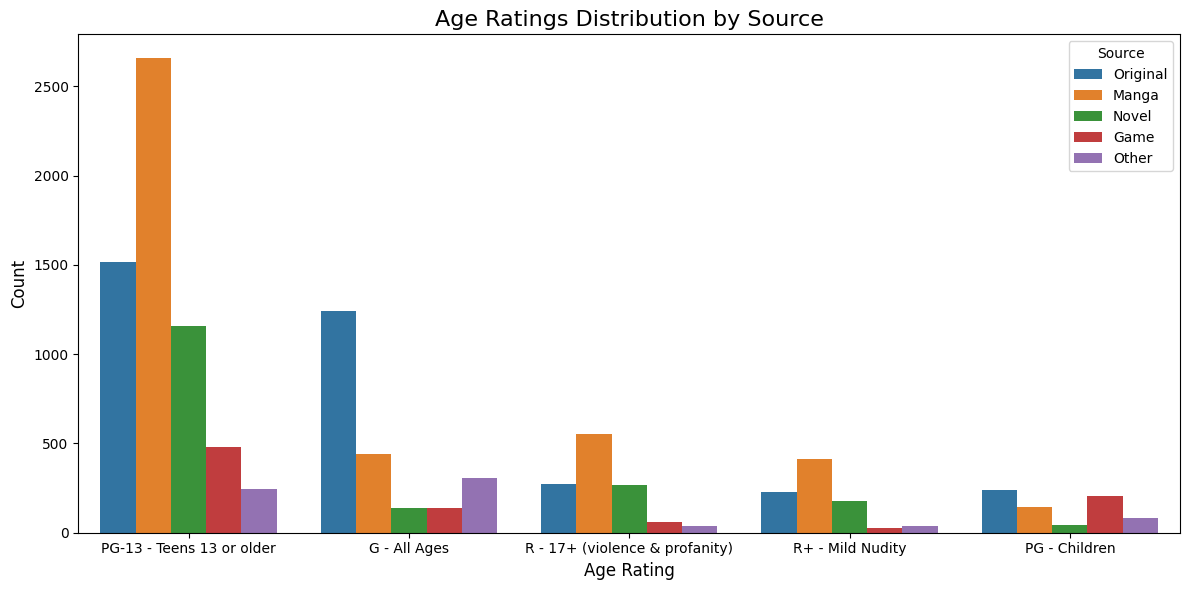

In [10]:
# @title Age Ratings Distrbution by Source
plt.figure(figsize=(12, 6))
sns.countplot(data=anime_full_dataset, x='Rating', hue='Source', order=anime_full_dataset['Rating'].value_counts().index)
plt.title('Age Ratings Distribution by Source', fontsize=16)
plt.xlabel('Age Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Source')
plt.tight_layout()
plt.show()

This graph shows us how the age ratings distribution over the Source categories. We can learn from this how our data is divided into
rating's categories and Source's categories. For example we can see that creators create more animes for "PG-13" than any of the others categories.

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categories = dict()
for col in categorical_cols:
  anime_full_dataset[col] = le.fit_transform(anime_full_dataset[col])
  valid_labels = list(le.classes_)
  categories[col] = valid_labels

<Axes: >

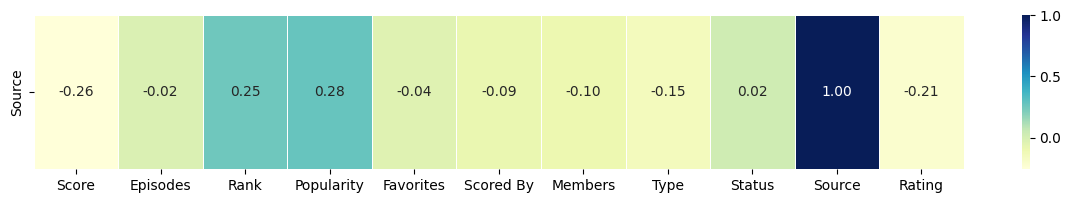

In [12]:
# @title Correlation of Source with each feature
dtf_corr = anime_full_dataset.corr(method="pearson").loc[["Source"]]
fig, ax = plt.subplots(figsize=(15,2))

sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)

The graph show us the correlation between Source and the others features we calculate the features by pearson method. This graph helps to identify which features are correlated with our target feature ("Surce"). We can see here that there is no strong correlation between Source and the othe features.

PART 3

In [13]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

def split_train_test(df_to_split, column_name, test_size=0.25):
  anime_train, anime_test = train_test_split(df_to_split.sort_values(column_name),
                        test_size=test_size)

  return anime_train, anime_test


In [14]:
def create_prediction(df_train, df_test, column_name, categorical=False):
  X_train = df_train.drop(column_name,axis=1)
  X_test = df_test.drop(column_name,axis=1)

  y_train = df_train[column_name]
  y_test = df_test[column_name]
  if categorical:
    model = LogisticRegression(max_iter=1000, solver="liblinear")
  else:
    model = LinearRegression()
  prediction = model.fit(X_train,y_train).predict(X_test)
  return y_test, prediction, model, X_train, X_test

In [15]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error, accuracy_score, precision_score, recall_score

def print_predictions_metrics_numerical(y_test, prediction):
  print("r2 score:","{:,.3f}".format(r2_score(y_test,prediction)))
  print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
  print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
  print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

  ## residuals
  residuals = y_test - prediction
  max_error = residuals.abs().max()
  print("Max Error:", "{:,.0f}".format(max_error))

def print_predictions_metrics_categorical(y_test, prediction, column_name):
  category_labels = categories[column_name]
  display_labels = range(0,y_test.unique().shape[0])

  Accuracy = accuracy_score(y_test, prediction)
  Precision = precision_score(y_test, prediction, average="micro")
  Sensitivity_recall = recall_score(y_test, prediction, average="micro")
  print(f"Accuracy: {Accuracy}\n Precision: {Precision}\n Recall: {Sensitivity_recall}")


In [16]:
def print_prediction_graph_numerical(y_test, prediction):
  fig, ax = plt.subplots(figsize=(8,5))
  sns.scatterplot(x=prediction, y=y_test,ax=ax)
  sns.lineplot(x=prediction, y=prediction,ax=ax,color='black')
  plt.show()



def print_prediction_graph_categorical(y_test, prediction, column_name):
  fig, ax = plt.subplots(figsize=(10,4))
  bins_size = len(categories[column_name])
  predictions_pandas = pd.Series(prediction)

  replace_dict = dict()
  category_labels = categories[column_name]
  for i, category in enumerate(category_labels):
    replace_dict[i] = category
  y_test.replace(replace_dict, inplace=True)
  predictions_pandas.replace(replace_dict, inplace=True)
  tickvalues = range(0,len(category_labels))
  plt.xticks(tickvalues, category_labels)


  # y_test.hist(ax=ax, edgecolor='black')
  # predictions_pandas.hist(ax=ax, alpha=0.5, edgecolor='black')

  y_test.value_counts().plot(kind='bar', title='y_test')
  plt.show()
  predictions_pandas.value_counts().plot(kind='bar', title='Prediction')
  plt.show()


In [17]:
def get_cool_message(df, column_name):
    message = f"""
### 🚀 **Running Predictions on {column_name} Column** 🚀
---
"""
    return message

In [18]:
from IPython.display import display, Markdown
def run_prediction(df, column_name, categorical=False):
  message = get_cool_message(df, column_name)
  display(Markdown(message))
  anime_train, anime_test = split_train_test(df, column_name)
  y_test, prediction, model, X_train, X_test = create_prediction(anime_train, anime_test, column_name, categorical)
  if categorical:
    print_predictions_metrics_categorical(y_test, prediction, column_name)
    print_prediction_graph_categorical(y_test, prediction, column_name)
  else:
    print_predictions_metrics_numerical(y_test, prediction)
    print_prediction_graph_numerical(y_test, prediction)
  return y_test, prediction, model, X_train, X_test


### 🚀 **Running Predictions on Source Column** 🚀
---


Accuracy: 0.4480028787333573
 Precision: 0.4480028787333573
 Recall: 0.4480028787333573


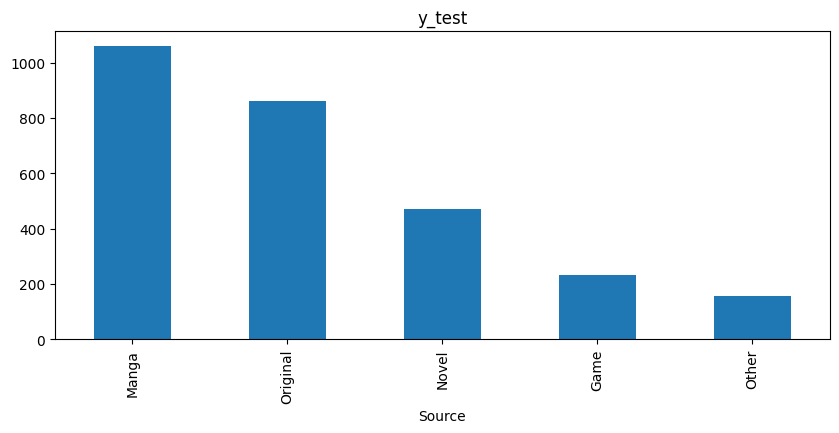

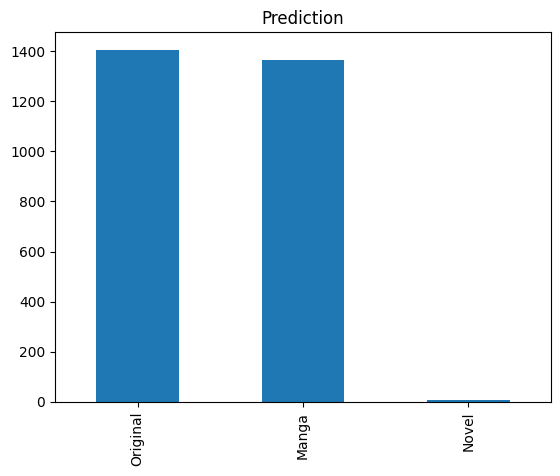

In [19]:
anime_source = anime_full_dataset
y_test_source, prediction_source, model_source, X_train_source, X_test_source = run_prediction(anime_source, 'Source', categorical=True)

PART 4 - Error Analysis

On which items the model performs the worst? The best?
Why do you think that is?

The prediction did capture the two main categories, manga and original. It also predicts a little bit of the third category Novel.

We think it makes sense because the existing features have low correlation to the Source feature (can be seen in the graphs of part 2).
In Anime there is information that can be used to infer the source, in example the name stores a lot of information, there are a lot of series that start with the same name and thus having the same source.
Here is an example from the show "shingeki no kyojin":

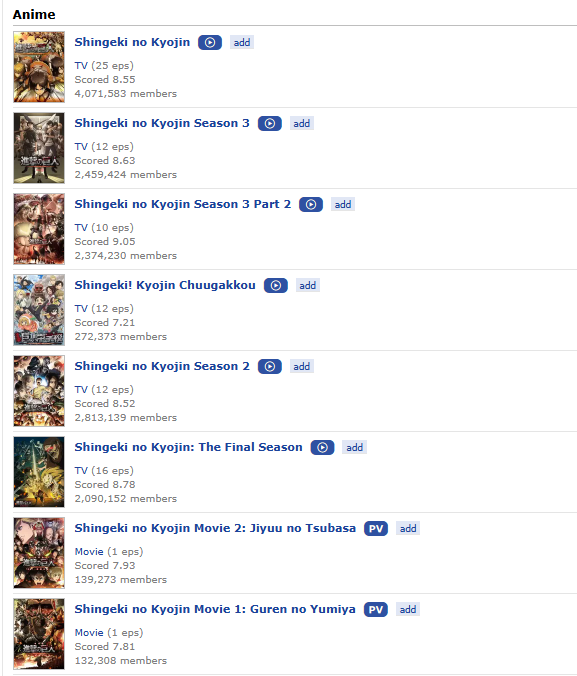


When we tested the numerical results, we saw overwhelming success, because the numerical values are all correlated positively or negatively with each other.
When a show is popular, is will be marked as favorite by more people (Favorites), it will have a higher rating (Score), it will be scored by more people because it will get more exposure (Scored by), and it will have higher rankings and be more popular (thus having lower values in Rank and Popularity columns).
To demonstrate it we will run the pipeline on two columns for example.


### 🚀 **Running Predictions on Score Column** 🚀
---


r2 score: 0.959
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.021
Mean Absolute Error (Σ|y - pred|/n): 0
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 0
Max Error: 3


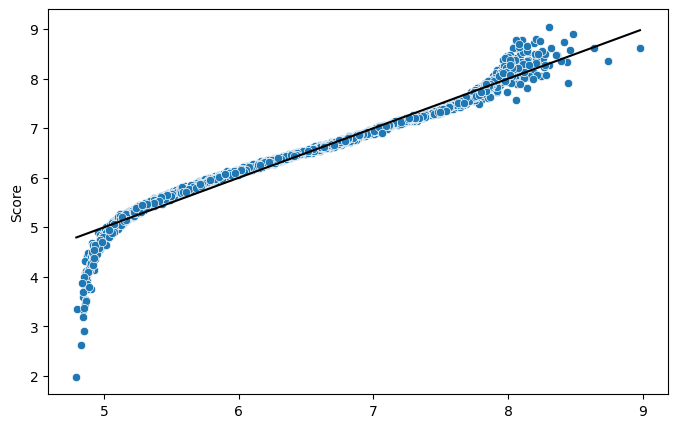


### 🚀 **Running Predictions on Rank Column** 🚀
---


r2 score: 0.962
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 1.464
Mean Absolute Error (Σ|y - pred|/n): 522
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 715
Max Error: 5,876


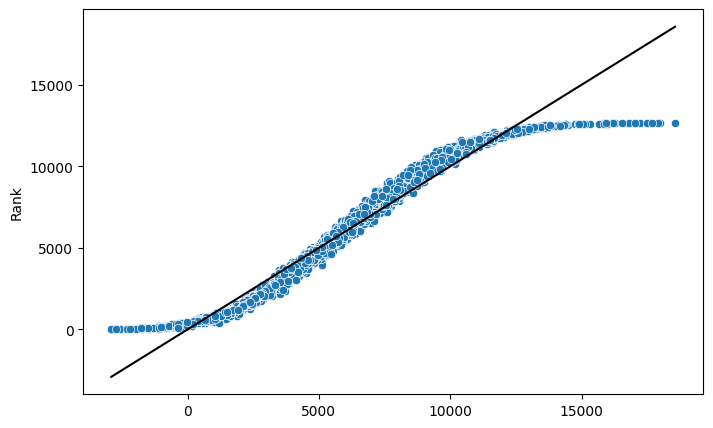

In [20]:
anime_score = anime_full_dataset
_, _, _, _, _ = run_prediction(anime_score, 'Score')
anime_rank = anime_full_dataset
_, _, _, _, _ = run_prediction(anime_rank, 'Rank')

We can see that the linear graphs are highly correlated to the data and if we look at the metrics, we can see r2 values that are pretty high and very low MAPE.

We did also notice that the other categorigal columns preform worse then the numerical ones, we checked the age rating and the anime Type (series, movie etc) and also saw worse results


### 🚀 **Running Predictions on Type Column** 🚀
---


Accuracy: 0.5811442965095358
 Precision: 0.5811442965095358
 Recall: 0.5811442965095358


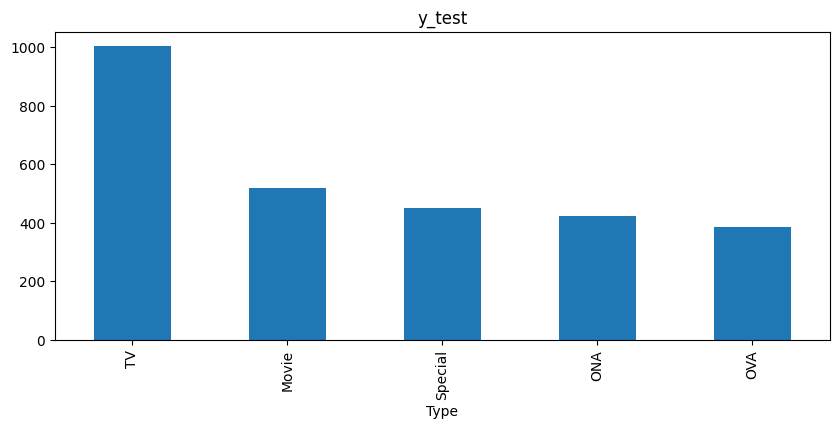

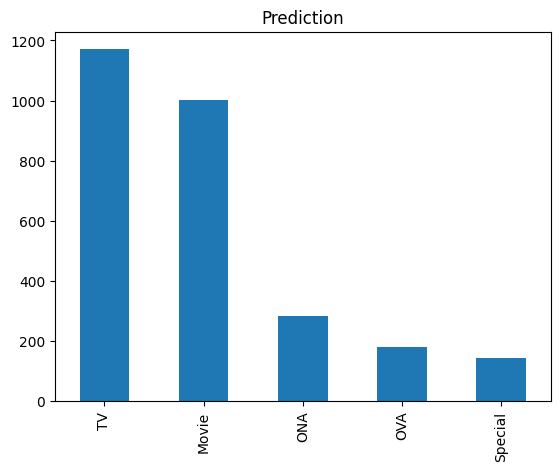


### 🚀 **Running Predictions on Rating Column** 🚀
---


Accuracy: 0.6034544800287873
 Precision: 0.6034544800287873
 Recall: 0.6034544800287873


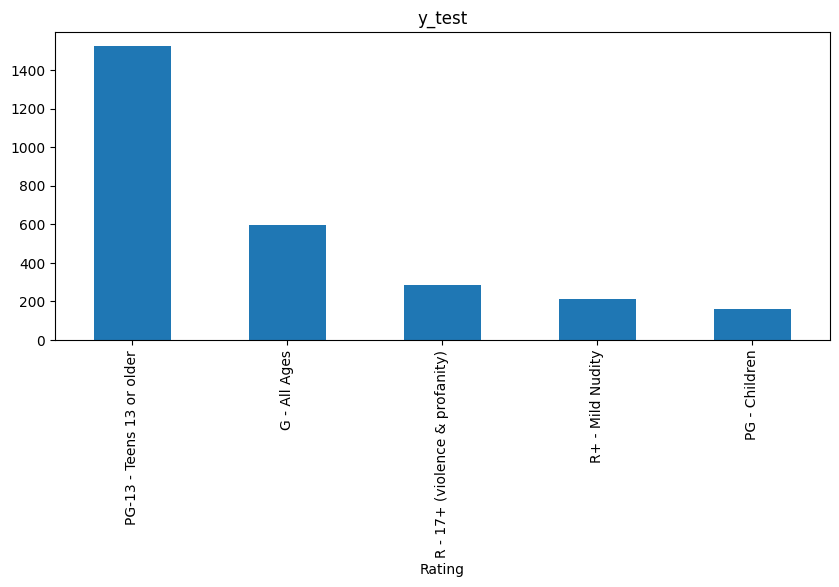

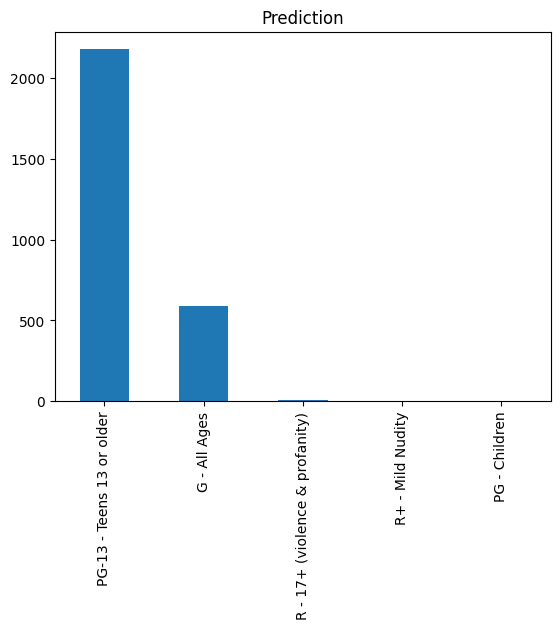

In [21]:
anime_type = anime_full_dataset
_, _, _, _, _ = run_prediction(anime_type, 'Type', categorical=True)
anime_rating = anime_full_dataset
_, _, _, _, _ = run_prediction(anime_rating, 'Rating', categorical=True)

In the above outputs we can see an aauracy and percision of ~58 precent which is pretty low, but still better then the Source. We wanted to work with the source because we think this data is more interesting and harder to predict

Are some features sabotaging the model? How?

We couldn't find features that sabotage the model, but we assumed that the feature "anime_id" which has no real meaning besides giving a unique key value to a row will distrupt the prediction so we removed it beforehand.
Let's try adding it now and see the results on our target column, source


### 🚀 **Running Predictions on Source Column** 🚀
---


Accuracy: 0.44512414537603456
 Precision: 0.44512414537603456
 Recall: 0.44512414537603456


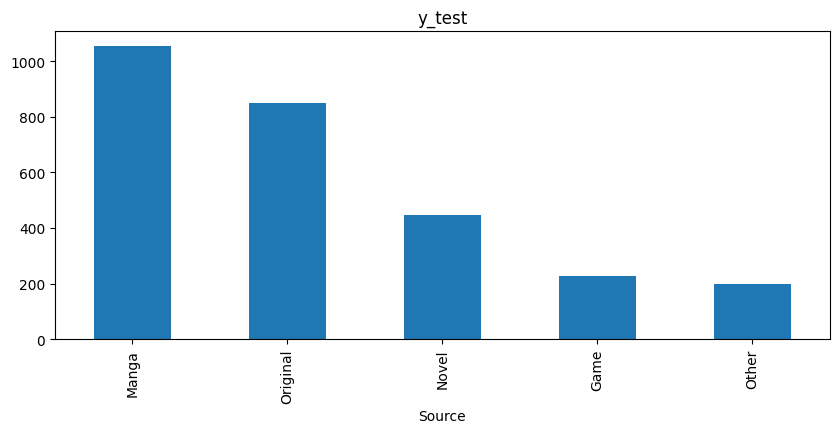

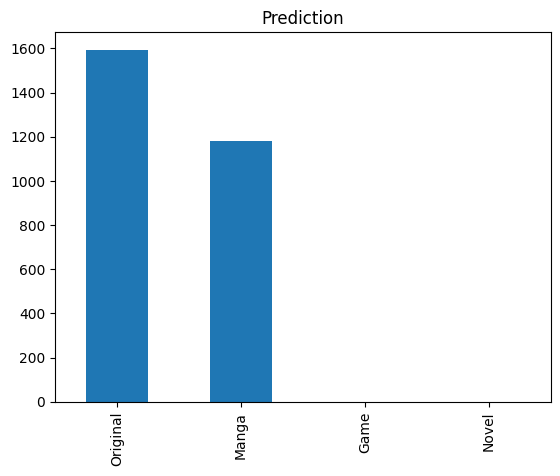

In [22]:
anime_dataset_with_id = anime_full_dataset
anime_dataset_with_id["anime_id"]  = anime_original_dataset["anime_id"]
_, _, _, _, _ = run_prediction(anime_dataset_with_id, 'Source', categorical=True)

We can see that the results are almost identical, even a little better, but it's probably coincidental, or results from overfitting to our data set. Clearly the anime_id that was given by the creator of the file by some order he chose doesn't really help the model infer the source of the Anime.

Finding commonalities in erroneous samples

Let's try to use shap summary plots to view the columns that impact the prediction the most.

summary plot Game


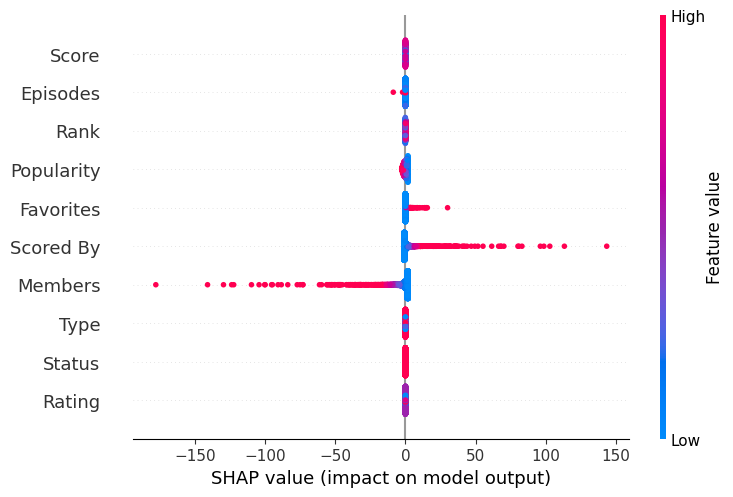

summary plot Manga


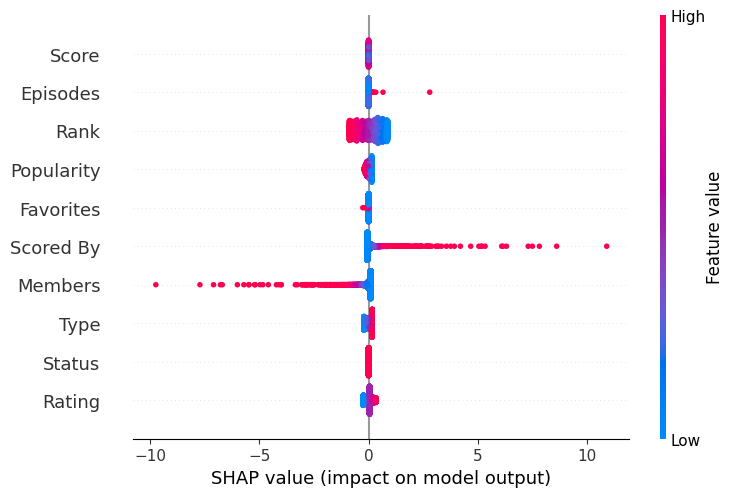

summary plot Novel


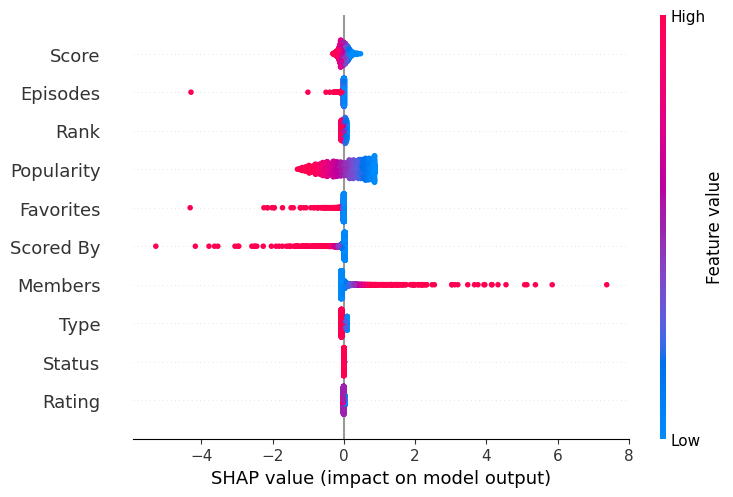

summary plot Original


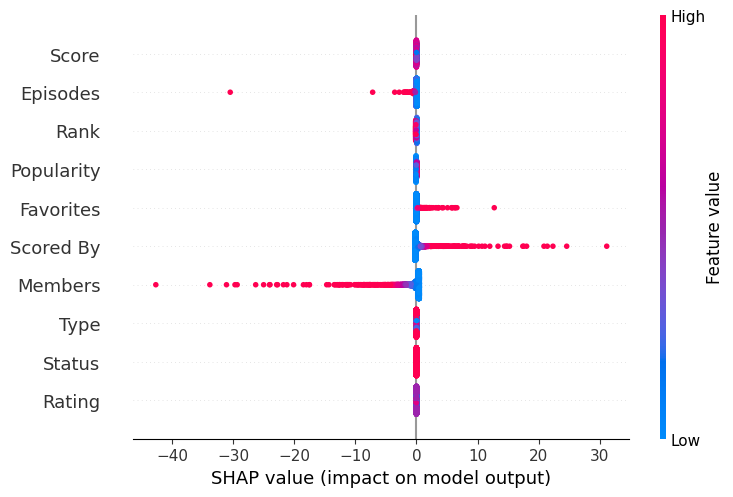

summary plot Other


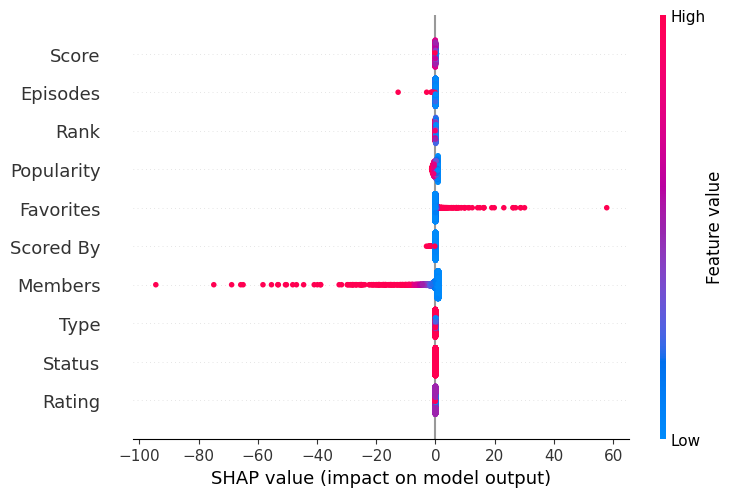

In [23]:
import shap

explainer = shap.Explainer(model_source, X_train_source)
shap_values = explainer(X_test_source)

for i, category in enumerate(categories["Source"]):
  print(f"summary plot {category}")
  shap.plots.beeswarm(shap_values[..., i], order=range(0,len(X_test_source.columns)))

# print()
# shap.plots.waterfall(shap_values[0, :, 0])
# shap.plots.waterfall(shap_values[0, :, 1])
# shap.plots.waterfall(shap_values[0, :, 2])
# shap.plots.waterfall(shap_values[0, :, 3])
# shap.plots.waterfall(shap_values[0, :, 4])
# prediction_source[0]


We can see that the two features that were the most impactful in all of the categories are Scored By and Members. Both are metrics that indicate how popular the show is. It's suprising to us that two correlating features are actually having opposite impact on the predictions.


<Axes: >

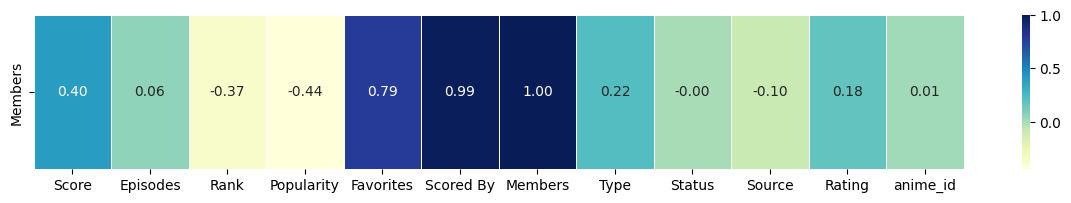

In [24]:
# @title A graph to support the correlation claim:
dtf_corr = anime_full_dataset.corr(method="pearson").loc[["Members"]]
fig, ax = plt.subplots(figsize=(15,2))

sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)

After we have seen that those features are the most impactful one, lets try and find commonalities in the score values of the wrongly classified samples.

below there are four graphs:

1) violin Members distribution by source of the test values

2) violin Members distribution by source of the test samples that were classified wrong.

3) violin Scored By distribution by source of the test values

4) violin Scored By distribution by source of the test samples that were classified wrong.

<ipython-input-25-1affdf69da40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_samples['Source'] = y_test_source[incorrect_mask]
<ipython-input-25-1affdf69da40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_samples['Predicted_Label'] = [categories['Source'][idx] for idx in prediction_source[incorrect_mask]]


Score              1534
Episodes           1534
Rank               1534
Popularity         1534
Favorites          1534
Scored By          1534
Members            1534
Type               1534
Status             1534
Rating             1534
Source             1534
Predicted_Label    1534
dtype: int64


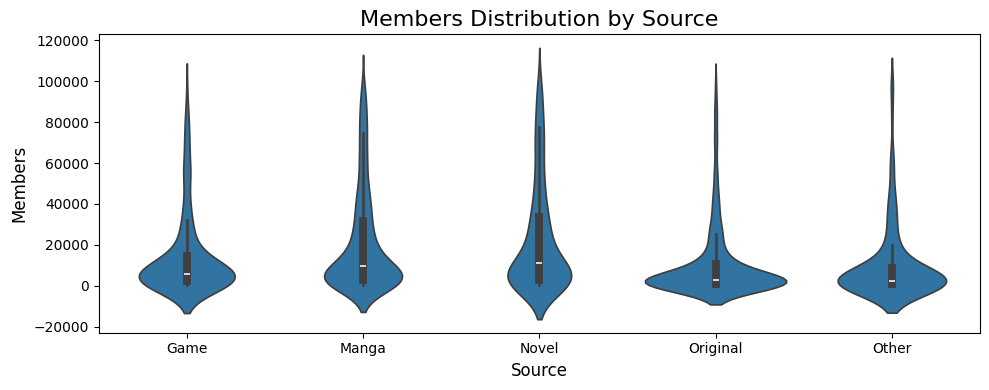

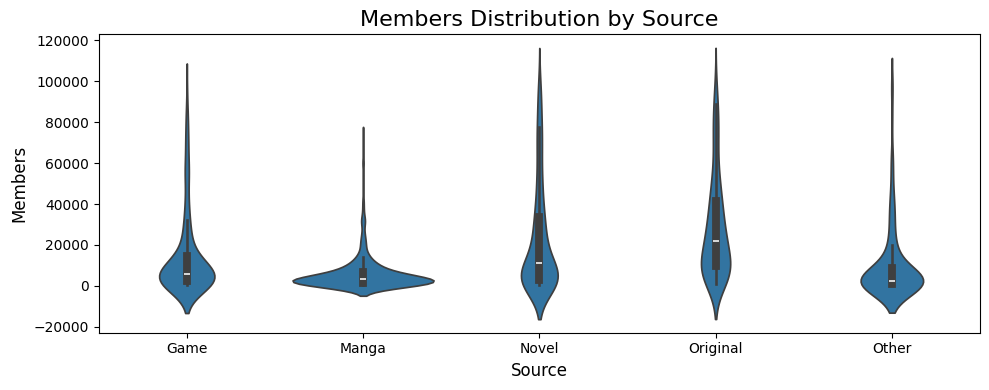

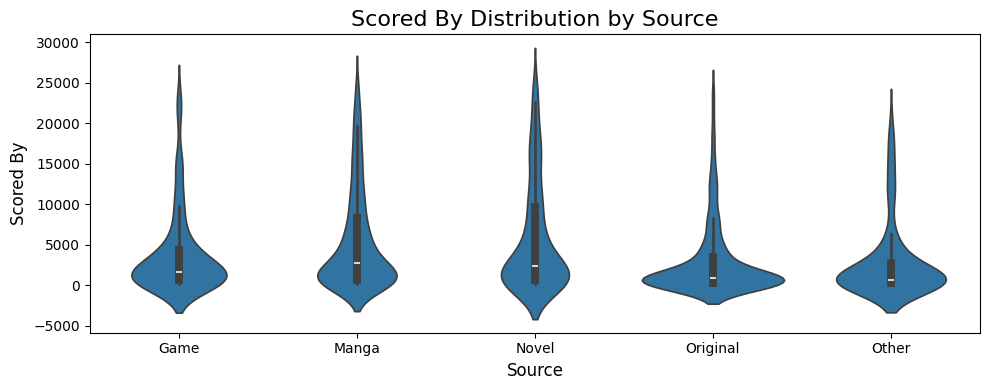

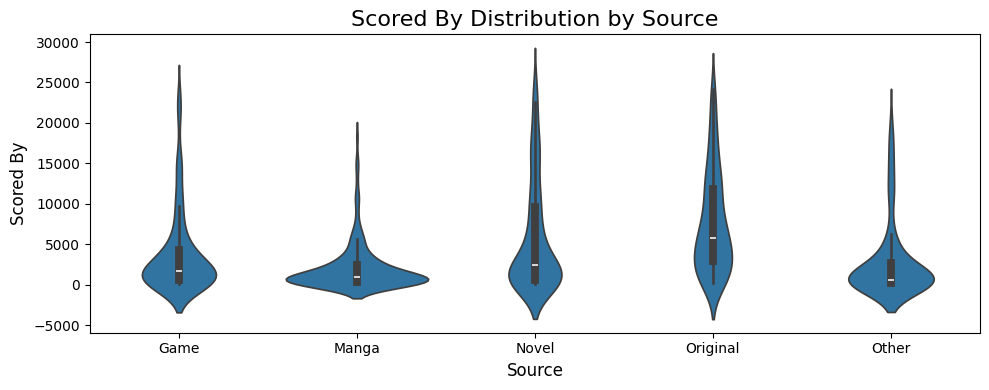

In [25]:
prediction_source_labels = [categories['Source'][idx] for idx in prediction_source]
incorrect_mask = (prediction_source_labels != y_test_source)
incorrect_samples = X_test_source[incorrect_mask]
incorrect_samples['Source'] = y_test_source[incorrect_mask]
incorrect_samples['Predicted_Label'] = [categories['Source'][idx] for idx in prediction_source[incorrect_mask]]
all_test_samples = X_test_source.copy()
all_test_samples["Source"] = y_test_source
print(incorrect_samples.count())
incorrect_samples.head()

def violin_members_by_source(df):
  violin_column_by_source(df, "Members")

violin_members_by_source(all_test_samples[all_test_samples["Members"] <= 100000])
violin_members_by_source(incorrect_samples[incorrect_samples["Members"] <= 100000])

def violin_scored_by_by_source(df):
  violin_column_by_source(df, "Scored By")

violin_scored_by_by_source(all_test_samples[all_test_samples["Scored By"] <= 25000])
violin_scored_by_by_source(incorrect_samples[incorrect_samples["Scored By"] <= 25000])


Let's rememeber that the prediction mostly predicted Manga and Anime, and just a tiny bit of novel. That means that the Game, Other and Novel categories are mostly wrong and we can see that their general shape between the graphs is preserved.
But if we look at the Manga and Original sources, we can see an interesting trend.

Even though Members and Scored By have opposite effects on the shap score. we can see that in both cases, anime with higher values of memebers and scored by are classified more as Manga and anime with lower values are classified more as original. We can infer that because when we compare the graphs of the whole test and only the wrong test we can see the the manga anime that werewrongly classified are actually the worse anime and the opposite for the Original anime.

Sources

The example from class - https://github.com/amitsomech/TDS-COURSE/blob/master/1.%20Introduction/Typical%20Regression%20Pipeline.ipynb

cleaning the df using function from documentation -
https://pandas.pydata.org/pandas-docs/version/0.24.0rc1/api/generated/pandas.DataFrame.dropna.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

cool markdown and graphs help - chatgpt

more graphs help - https://python-graph-gallery.com/histogram/

help with categorical metric: https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=Confusion%20matrixes%20can%20be%20created%20by%20predictions%20made%20from%20a%20logistic%20regression.&text=Next%20we%20will%20need%20to,%22%20and%20%22predicted%22%20values.&text=In%20order%20to%20create%20the,metrics%20from%20the%20sklearn%20module.
